In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np 

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
dt=load_wine()
print(dir(dt))

print('-'*90+ '\n'*3 + 'next is whole data')
dt



['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
------------------------------------------------------------------------------------------


next is whole data


{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

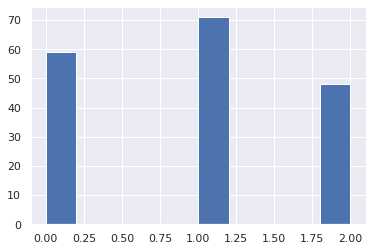

In [32]:
import matplotlib.pyplot as plt
import seaborn;
seaborn.set()
plt.hist(dt.target)

<font color:blue> ** 이번 에는 와인을 예측해 보겠다. 3개의 레이블이 있다. 3개의 답지를 잘 예측하는 녀석을 만들어보자!!!</font>

In [33]:

dt_data = dt.data
dt_label = dt.target
print(dt_data.shape)


dt_df = pd.DataFrame(data=dt_data, columns=dt.feature_names)
dt_df["label"] = dt.target

X_train, X_test, y_train, y_test = train_test_split(dt_data, 
                                                    dt_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

(178, 13)


In [34]:
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((36, 13), (36,))

y_pred 는 예측 값 입니다. 
정확도 = 예측 결과가 정답인 데이터의 개수 / 예측한 전체 데이터의 개수

In [35]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1])

In [36]:
y_test

array([2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1])

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

accuracy = accuracy_score(y_test, y_pred)
accuracy



0.9444444444444444

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array = confusion_matrix(y_test, y_pred) 
total = np.sum(array, axis = 1)
array1 = array / total[:,None]
t1 = array1
array1

print('-'*90)
sum1 = 0
for i in range(array1.shape[0]):
    for j in range (array1.shape[1]):
        if j != i:
            sum1 = sum1 + array[i][j]
print(sum1)

------------------------------------------------------------------------------------------
2


### axis = 1 은 행 단위로 더했다는 뜻입니다.
Confusion matrix 를 보면 decision tree 의 결과는 다음과 같습니다
다음은 random_forest 를 보겠습니다

In [40]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))



accuracy = accuracy_score(y_test, y_pred)
accuracy
confusion_matrix(y_test, y_pred)
array2 = confusion_matrix(y_test, y_pred) 
total2 = np.sum(array, axis = 1)
array2 = array / total2[:,None]
t2 = array2
array2
print('-'*90)

sum2 = 0
for i in range(array2.shape[0]):
    for j in range (array2.shape[1]):
        if j != i:
            sum2 = sum2 + array[i][j]
print(sum2)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

------------------------------------------------------------------------------------------
2


classification_report 를 보았을 때는 다 1이 나와서 최고의 모델인가 생각을 했는데
막상 뚜껑을 열어보니 그렇지가 않습니다.

array2 를 보면 label3 이 조금 틀렸습니다


In [41]:
from sklearn import svm
import numpy as np
svm_model = svm.SVC()
random_forest = RandomForestClassifier(random_state=32)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred) 

array = confusion_matrix(y_test, y_pred) 
total = np.sum(array, axis = 1)
array3 = array / total[:,None]
t3 = array3
array3

print('-'*90)
sum3 = 0
for i in range(array3.shape[0]):
    for j in range (array3.shape[1]):
        if j != i:
            sum3 = sum3 + array[i][j]
print(sum3)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36

------------------------------------------------------------------------------------------
14


svm 모델은 조금 차이가 있습니다. 앞서 비교해보았을때 정확도가 훅 떨어집니다. 
2을 주었을 때 1,3 으로 대답한 게 한개씩 있어서 오류가 있습니다.


In [42]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

random_forest = RandomForestClassifier(random_state=32)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)
array = confusion_matrix(y_test, y_pred) 
total = np.sum(array, axis = 1)
array4 = array / total[:,None]
t4 = array4
array4

print('-'*90)
sum4 = 0
for i in range(array4.shape[0]):
    for j in range (array4.shape[1]):
        if j != i:
            sum4 = sum4 + array[i][j]
print(sum4)

classifier
              precision    recall  f1-score   support

           0       0.54      1.00      0.70         7
           1       0.85      0.65      0.73        17
           2       0.60      0.50      0.55        12

    accuracy                           0.67        36
   macro avg       0.66      0.72      0.66        36
weighted avg       0.70      0.67      0.66        36

------------------------------------------------------------------------------------------
12


### sgd 모델도 정확도가 떨어집니다.
특히 2번(3번째 레이블) 의 정확도가 꽤 떨어집니다. 

In [43]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)
array = confusion_matrix(y_test, y_pred) 
total = np.sum(array, axis = 1)
array5 = array / total[:,None]
t5 = array5
array5

print('-'*90)
sum5 = 0
for i in range(array5.shape[0]):
    for j in range (array5.shape[1]):
        if j != i:
            sum5 = sum5 + array[i][j]
print(sum5)

classifier
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36

------------------------------------------------------------------------------------------
1


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


선형회귀 모델이 그나마 앞선 모델들 보다 낫습니다

------------------------------------------------------------------------------------------
decision forest


[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.16666667 0.83333333]]


[1.         1.16666667 0.83333333]
------------------------------------------------------------------------------------------
random forest


[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.16666667 0.83333333]]


[1.         1.16666667 0.83333333]
------------------------------------------------------------------------------------------
svm model


[[0.85714286 0.         0.14285714]
 [0.05882353 0.88235294 0.05882353]
 [0.         0.91666667 0.08333333]]


[0.91596639 1.79901961 0.28501401]
------------------------------------------------------------------------------------------
sgd model


[[1.         0.         0.        ]
 [0.11764706 0.64705882 0.23529412]
 [0.33333333 0.16666667 0.5       ]]


[1.45098039 0.81372549 0.7352

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([0.85714286, 0.88571429, 0.91428571, 0.94285714, 0.97142857,
        1.        , 1.02857143, 1.05714286, 1.08571429, 1.11428571,
        1.14285714]),
 <BarContainer object of 10 artists>)

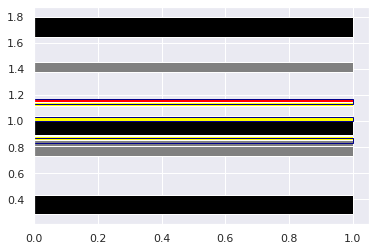

In [44]:
print('-'*90)
print('decision forest')
print('\n')
print(t1)
print('\n')

x1 = t1.sum(axis = 0)

print(x1)
plt.hist(x1, histtype = 'step',orientation = 'horizontal',color = 'darkblue')


print('-'*90)
print('random forest')
print('\n')
print(t2)
x2 = t2.sum(axis = 0)
print('\n')
print(x2)
plt.hist(x2, histtype = 'barstacked',orientation = 'horizontal', color = 'red')

print('-'*90)
print('svm model')
print('\n')
print(t3)
print('\n')
x3 = t3.sum(axis = 0)
print(x3)
plt.hist(x3, histtype = 'barstacked',orientation = 'horizontal', color = 'black')

print('-'*90)
print('sgd model')
print('\n')
print(t4)
print('\n')
x4 = t4.sum(axis = 0)
print(x4)
plt.hist(x4, histtype = 'barstacked',orientation = 'horizontal', color = 'gray')

print('-'*90)
print('logistic model')
print('\n')
print(t5)
print('\n')
x6 = t5.sum(axis = 0)
print(x6)
seaborn.set()
plt.hist(x6, histtype = 'barstacked',orientation = 'horizontal',color ='yellow')



In [45]:


# 편차가 큰(정확도가 떨어지는 ) 모델들은 1.0 index 에 집중되지 않고 퍼져서 그래프가 나온다. 

## axis=0 으로 열 단위로 더하니까 많은 숫자가 나온 열이 문제가 있다는 뜻이 된다.

svm 모델에서는 2열이 즉, 2번째 레이블을 예측할때 많은 실패가 있었다.
행, 렬의 대각 라인만 더하는 함수를 짜고 싶었는데 잘 안되었다
결과를 이렇게 한번에 보니까 svm 모델이 문제가 꽤 많다.

SVM은 분류에 사용되는 지도학습 머신러닝 모델이다.
SVM은 서포트 벡터(support vectors)를 사용해서 결정 경계(Decision Boundary)를 정의하고, 분류되지 않은 점을 해당 결정 경계와 비교해서 분류한다.
서포트 벡터(support vectors)는 결정 경계에 가장 가까운 각 클래스의 점들이다.


SyntaxError: invalid syntax (196439648.py, line 5)

(array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
        [2., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([0.        , 0.09166667, 0.18333333, 0.275     , 0.36666667,
        0.45833333, 0.55      , 0.64166667, 0.73333333, 0.825     ,
        0.91666667]),
 <a list of 3 BarContainer objects>)

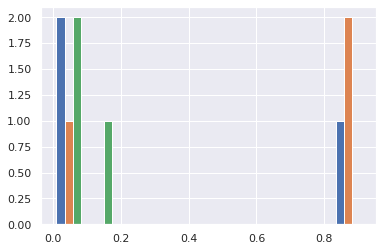

In [46]:
plt.hist(t3)


(array([[0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
        [1., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 1., 0., 0., 1., 0., 0., 0., 0.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 3 BarContainer objects>)

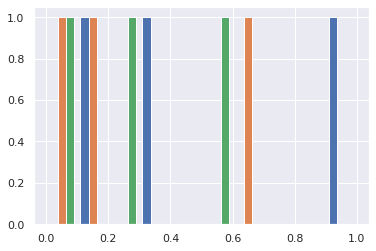

In [47]:
plt.hist(t4)


#길게 갈 것 없이, 이렇게 편차 확인도 가능하다

(array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [2., 0., 0., 0., 0., 0., 0., 0., 1., 0.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 3 BarContainer objects>)

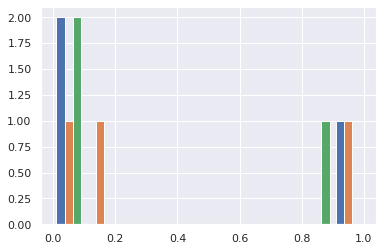

In [48]:
plt.hist(t1)


(array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [2., 0., 0., 0., 0., 0., 0., 0., 1., 0.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 3 BarContainer objects>)

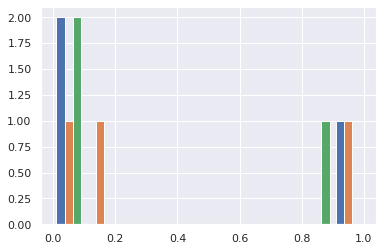

In [49]:
plt.hist(t2)


(array([[2., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 3 BarContainer objects>)

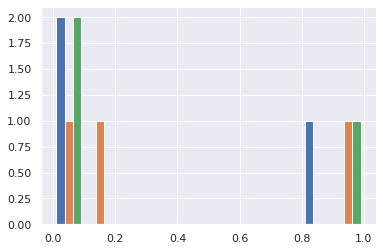

In [50]:
plt.hist(t5)

In [ ]:
## 5번이 가장 좋은 데이터 모델 임을 숫자로도, 시각적으로도 파악이 가능하다

In [51]:
print(sum1,sum2,sum3,sum4,sum5)

2 2 14 12 1
